In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
import textwrap

In [2]:
data_score_humanities = pd.read_csv('score_humanities.csv')
data_score_science = pd.read_csv('score_science.csv')
data_universities = pd.read_csv('universities.csv')
data_majors = pd.read_csv('majors.csv')

In [3]:
score_humanities = data_score_humanities.copy()
score_humanities.head()

,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos
0,0,3322014,332,3532154,353,26,778,486,679,594,643,686,559,392,676
1,1,3212057,321,3322022,332,35,579,631,710,700,810,656,638,535,686
2,2,3722057,372,1912042,191,44,600,481,314,432,522,494,461,467,574
3,3,3212081,321,3212301,321,55,559,563,646,638,591,538,585,647,589
4,4,3812106,381,3852034,385,171,838,734,654,613,690,315,628,660,674


In [4]:
score_science = data_score_science.copy()
score_science.head()

,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu
0,0,3321065,332,3331187,333,4,400,400,400,400,400,400,400,400
1,1,3211015,321,3611066,361,14,816,666,651,678,685,706,695,562
2,2,3721093,372,3551302,355,19,562,839,624,700,781,464,551,668
3,3,3321096,332,3551194,355,23,700,669,692,679,692,813,507,573
4,4,5211104,521,5211085,521,28,461,619,441,593,563,500,666,370


In [5]:
data_majors.head()

,Unnamed: 0,id_major,id_university,type,major_name,capacity
0,0,1111014,111,science,PENDIDIKAN DOKTER HEWAN,88
1,1,1111022,111,science,TEKNIK SIPIL,64
2,2,1111037,111,science,TEKNIK MESIN,48
3,3,1111045,111,science,TEKNIK KIMIA,48
4,4,1111053,111,science,ARSITEKTUR,48


In [6]:
data_universities.head()

,Unnamed: 0,id_university,university_name
0,0,111,UNIVERSITAS SYIAH KUALA
1,1,112,UNIVERSITAS MALIKUSSALEH
2,2,113,UNIVERSITAS TEUKU UMAR
3,3,114,UNIVERSITAS SAMUDRA
4,4,115,ISBI ACEH


In [7]:
print(score_humanities.info())
print('\n')
print(score_science.info())
print('\n')
print(data_majors.info())
print('\n')
print(data_universities.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61202 entries, 0 to 61201
Data columns (total 15 columns):
Unnamed: 0              61202 non-null int64
id_first_major          61202 non-null int64
id_first_university     61202 non-null int64
id_second_major         61202 non-null int64
id_second_university    61202 non-null int64
id_user                 61202 non-null int64
score_eko               61202 non-null int64
score_geo               61202 non-null int64
score_kmb               61202 non-null int64
score_kpu               61202 non-null int64
score_kua               61202 non-null int64
score_mat               61202 non-null int64
score_ppu               61202 non-null int64
score_sej               61202 non-null int64
score_sos               61202 non-null int64
dtypes: int64(15)
memory usage: 7.0 MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86570 entries, 0 to 86569
Data columns (total 14 columns):
Unnamed: 0              86570 non-null int64
id_first_major  

# Exploratory Data Analysis

In [8]:
#  First of all, calculate the average of total score
score_humanities['avg_score'] = score_humanities.iloc[:, 6:15].mean(axis = 1)
score_science['avg_score'] = score_science.iloc[:, 6:14].mean(axis = 1)

In [9]:
# Merge score_humanities with major and university dataframe to get major and university names
# First choice major and university
score_humanities = pd.merge(score_humanities, data_majors[['id_major','major_name']], left_on = 'id_first_major'
                            , right_on = 'id_major').drop(['id_major', 'id_first_major'], axis = 1)

score_humanities = pd.merge(score_humanities, data_universities[['id_university','university_name']], left_on = 'id_first_university'
                            , right_on = 'id_university').drop(['id_university', 'id_first_university'], axis = 1)

score_humanities['specific_first_choice'] = score_humanities['major_name'] +' - ' +score_humanities['university_name']
score_humanities['avg_score_first_choice'] = score_humanities.groupby('specific_first_choice')['avg_score'].transform('mean')

# Second choice major and university
# Initiate suffixes to give specific columns name because there are major and university name columns before, so it will be duplicated.
score_humanities = pd.merge(score_humanities, data_majors[['id_major','major_name']], left_on = 'id_second_major'
                            , right_on = 'id_major', suffixes=('_first_choice', '_second_choice')).drop(['id_major', 'id_second_major'], axis = 1)

score_humanities = pd.merge(score_humanities, data_universities[['id_university','university_name']], left_on = 'id_second_university'
                            , right_on = 'id_university', suffixes=('_first_choice', '_second_choice')).drop(['id_university', 'id_second_university'], axis = 1)

score_humanities['specific_second_choice'] = score_humanities['major_name_second_choice'] +' - ' +score_humanities['university_name_second_choice']
score_humanities['avg_score_second_choice'] = score_humanities.groupby('specific_second_choice')['avg_score'].transform('mean')
# Drop 'Unnamed: 0' columns, which is will not use in this project. Then, sort values by id_user
score_humanities = score_humanities.drop('Unnamed: 0', axis = 1).sort_values('id_user')
score_humanities.head()

,id_user,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos,avg_score,major_name_first_choice,university_name_first_choice,specific_first_choice,avg_score_first_choice,major_name_second_choice,university_name_second_choice,specific_second_choice,avg_score_second_choice
0,26,778,486,679,594,643,686,559,392,676,610.333333,FAKULTAS SENIRUPA DAN DESAIN (FSRD),INSTITUT TEKNOLOGI BANDUNG,FAKULTAS SENIRUPA DAN DESAIN (FSRD) - INSTITUT...,573.447122,DESAIN KOMUNIKASI VISUAL,UNIVERSITAS SEBELAS MARET,DESAIN KOMUNIKASI VISUAL - UNIVERSITAS SEBELAS...,549.880193
18147,35,579,631,710,700,810,656,638,535,686,660.555556,ILMU KOMUNIKASI,UNIVERSITAS INDONESIA,ILMU KOMUNIKASI - UNIVERSITAS INDONESIA,569.865539,SEKOLAH BISNIS DAN MANAJEMEN (SBM),INSTITUT TEKNOLOGI BANDUNG,SEKOLAH BISNIS DAN MANAJEMEN (SBM) - INSTITUT ...,572.911111
55150,44,600,481,314,432,522,494,461,467,574,482.777778,MANAJEMEN,UNIVERSITAS BRAWIJAYA,MANAJEMEN - UNIVERSITAS BRAWIJAYA,557.766667,MANAJEMEN,UNIVERSITAS LAMPUNG,MANAJEMEN - UNIVERSITAS LAMPUNG,518.014286
4415,55,559,563,646,638,591,538,585,647,589,595.111111,KRIMINOLOGI,UNIVERSITAS INDONESIA,KRIMINOLOGI - UNIVERSITAS INDONESIA,560.866487,BAHASA DAN KEBUDAYAAN KOREA,UNIVERSITAS INDONESIA,BAHASA DAN KEBUDAYAAN KOREA - UNIVERSITAS INDO...,544.579580
46414,171,838,734,654,613,690,315,628,660,674,645.111111,AKUNTANSI,UNIVERSITAS AIRLANGGA,AKUNTANSI - UNIVERSITAS AIRLANGGA,580.595322,AKUNTANSI,"UPN ""VETERAN"" JAWA TIMUR","AKUNTANSI - UPN ""VETERAN"" JAWA TIMUR",547.709877


In [10]:
# Merge score_science with major and university dataframe to get major and university names
# First choice major and university
score_science = pd.merge(score_science, data_majors[['id_major','major_name']], left_on = 'id_first_major', right_on = 'id_major'
                         , suffixes=('_first', '_second')).drop(['id_major', 'id_first_major'], axis = 1)

score_science = pd.merge(score_science, data_universities[['id_university','university_name']], left_on = 'id_first_university'
                            , right_on = 'id_university', suffixes=('_first_choice', '_second_choice')).drop(['id_university', 'id_first_university'], axis = 1)

score_science['specific_first_choice'] = score_science['major_name'] +' - ' +score_science['university_name']
score_science['avg_score_first_choice'] = score_science.groupby('specific_first_choice')['avg_score'].transform('mean')
# Second choice major and university
# Initiate suffixes to give specific columns name because there are major and university name columns before, so it will be duplicated.
score_science = pd.merge(score_science, data_majors[['id_major','major_name']]
         , left_on = 'id_second_major', right_on = 'id_major', suffixes=('_first_choice', '_second_choice')).drop(['id_major', 'id_second_major'], axis = 1)

score_science = pd.merge(score_science, data_universities[['id_university','university_name']], left_on = 'id_second_university'
                            , right_on = 'id_university', suffixes=('_first_choice', '_second_choice')).drop(['id_university', 'id_second_university'], axis = 1)

score_science['specific_second_choice'] = score_science['major_name_second_choice'] +' - ' +score_science['university_name_second_choice']
score_science['avg_score_second_choice'] = score_science.groupby('specific_second_choice')['avg_score'].transform('mean')
# Drop 'Unnamed: 0' columns, which is will not use in this project. Then, sort values by id_user
score_science = score_science.drop('Unnamed: 0', axis = 1).sort_values('id_user')
score_science.head()

,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu,avg_score,major_name_first_choice,university_name_first_choice,specific_first_choice,avg_score_first_choice,major_name_second_choice,university_name_second_choice,specific_second_choice,avg_score_second_choice
0,4,400,400,400,400,400,400,400,400,400.000,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS - I...,601.102586,PSIKOLOGI,UNIVERSITAS PADJADJARAN,PSIKOLOGI - UNIVERSITAS PADJADJARAN,557.648634
4237,14,816,666,651,678,685,706,695,562,682.375,PENDIDIKAN DOKTER,UNIVERSITAS INDONESIA,PENDIDIKAN DOKTER - UNIVERSITAS INDONESIA,610.945050,KEDOKTERAN,UNIVERSITAS GADJAH MADA,KEDOKTERAN - UNIVERSITAS GADJAH MADA,606.664062
24120,19,562,839,624,700,781,464,551,668,648.625,ILMU DAN TEKNOLOGI PANGAN,UNIVERSITAS BRAWIJAYA,ILMU DAN TEKNOLOGI PANGAN - UNIVERSITAS BRAWIJAYA,554.377591,TEKNOLOGI PANGAN,UNIVERSITAS DIPONEGORO,TEKNOLOGI PANGAN - UNIVERSITAS DIPONEGORO,564.494391
24634,23,700,669,692,679,692,813,507,573,665.625,FAKULTAS TEKNIK MESIN & DIRGANTARA (FTMD),INSTITUT TEKNOLOGI BANDUNG,FAKULTAS TEKNIK MESIN & DIRGANTARA (FTMD) - IN...,618.625000,TEKNIK MESIN,UNIVERSITAS DIPONEGORO,TEKNIK MESIN - UNIVERSITAS DIPONEGORO,589.242347
85156,28,461,619,441,593,563,500,666,370,526.625,TEKNIK PERANGKAT LUNAK (TEK. INFORMATIKA),UNIVERSITAS PALANGKARAYA,TEKNIK PERANGKAT LUNAK (TEK. INFORMATIKA) - UN...,503.653846,TEKNIK SIPIL,UNIVERSITAS PALANGKARAYA,TEKNIK SIPIL - UNIVERSITAS PALANGKARAYA,517.180556


## Analysis Numeric and Categorical Data on "Score Humanities" Data

### Analysis Numeric Data on "Score Humanities" Data

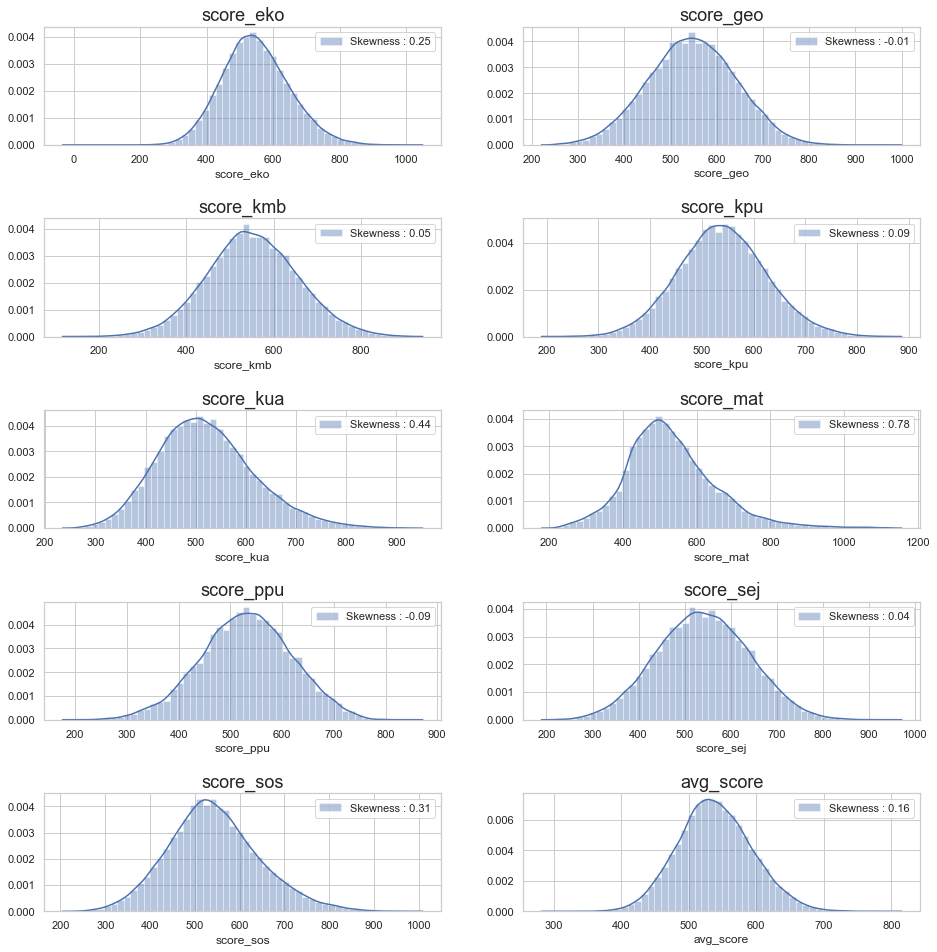

In [11]:
# Create distribution plot on each columns
fig, ax = plt.subplots(5, 2, figsize = (14, 14))
fig.tight_layout(pad = 5)

# Define numeric columns on "Score Humanities" Data
num_score_humanities = ['score_eko', 'score_geo', 'score_kmb', 'score_kpu','score_kua'
                        , 'score_mat', 'score_ppu', 'score_sej', 'score_sos', 'avg_score']

for ax, n in zip(ax.flatten(), num_score_humanities):
    sns.distplot(ax = ax, a = score_humanities[n].dropna(), label = "Skewness : %.2f"%(score_humanities[n].skew()))
    ax.set_title(n, fontsize = 18)
    ax.legend(loc = 'best')

plt.show()

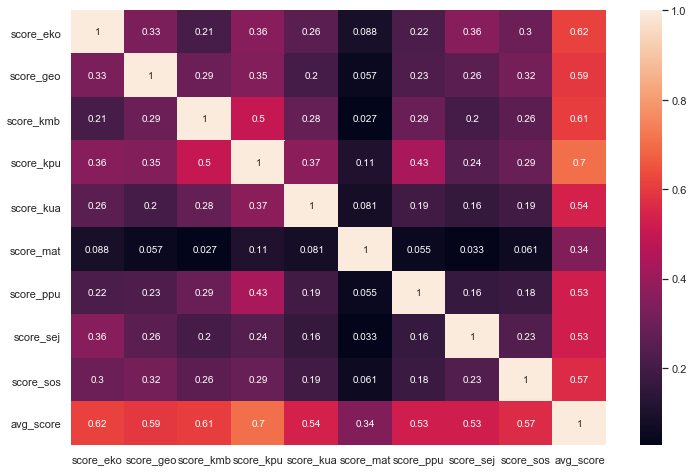

In [12]:
# Create heatmap data numeric
cormat = score_humanities[num_score_humanities].corr()
fig, ax = plt.subplots(figsize = (12, 8))
sns.heatmap(ax = ax, data = cormat, annot = True)
ax.set_yticklabels(cormat,rotation = 0)
plt.show()

### Analysis Categorical Data on "Score Humanities" Data

#### Analysis First Choices Major & University on "Score Humanities" Data

In [13]:
# Define categorical columns on "Score Humanities" Data
first_choice_humanities = ['major_name_first_choice', 'university_name_first_choice']
first_choice_titles = ['Top 10 First Choices Humanities Majors', 'Top 10 First Choices University (Humanities Majors)']

##### - Barplot Top 10 First Choices Major and University

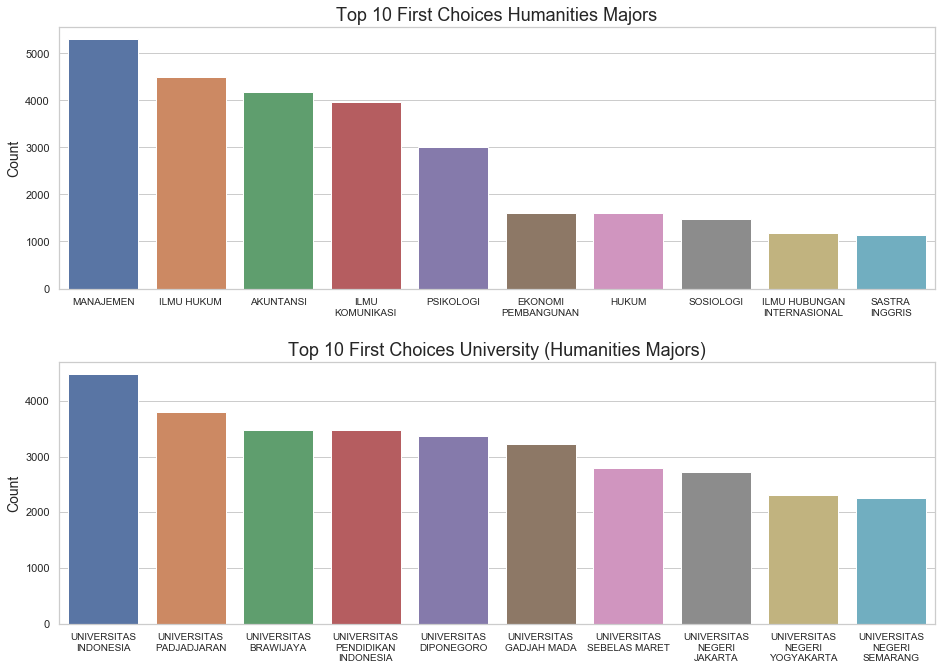

In [14]:
fig, ax = plt.subplots(len(first_choice_humanities), 1, figsize = (14, 10))
fig.tight_layout(pad = 5)
max_width = 13
for ax, col, name in zip(ax.flatten(), first_choice_humanities, first_choice_titles):
    index = score_humanities[col].fillna('NaN').value_counts().index
    count = score_humanities[col].fillna('NaN').value_counts()
    sns.barplot(ax = ax, x = index, y = count, order = index[0:10])
    ax.set_title(name, fontsize = 18)
    ax.set_ylabel('Count', fontsize = 14)
    ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
plt.show()

##### - Boxplot Top 10 First Choices Major and University

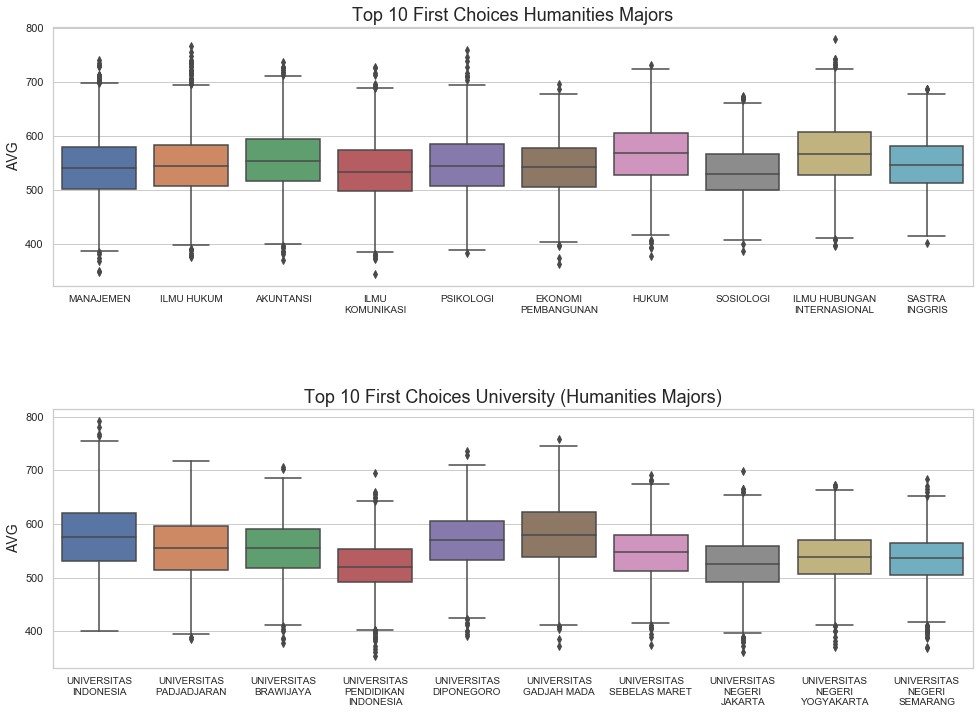

In [15]:
fig, ax = plt.subplots(len(first_choice_humanities), 1, figsize = (16, 12))
fig.tight_layout(pad = 10)
max_width = 13

for ax, col, name in zip(ax.flatten(), first_choice_humanities, first_choice_titles):
    values = score_humanities[col].value_counts().sort_values(ascending = False).index[0:10]
    top_data = score_humanities[score_humanities[col].isin(values)]
    sns.boxplot(ax = ax, data=top_data, x = top_data[col], y = top_data['avg_score'], order = values)
    ax.set_title(name, fontsize = 18)
    ax.set_xlabel('')
    ax.set_ylabel('AVG', fontsize = 14)
    ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)

plt.show()

##### - Barplot and Boxplot Top 5 First Choices Major - University

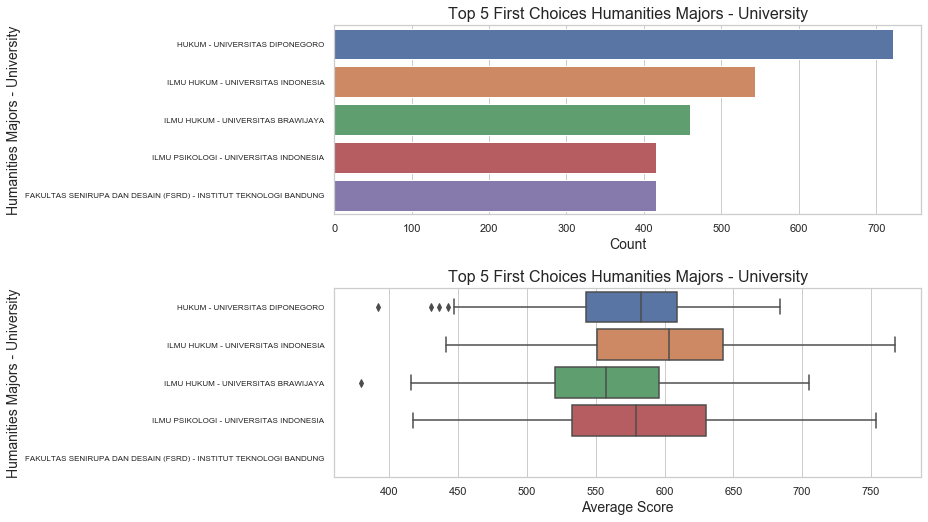

In [16]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
fig.tight_layout(pad = 5)

index = score_humanities['specific_first_choice'].fillna('NaN').value_counts().index
count = score_humanities['specific_first_choice'].fillna('NaN').value_counts()
sns.barplot(ax = ax[0], x = count, y = index, order = index[0:5])
ax[0].set_title('Top 5 First Choices Humanities Majors - University', fontsize = 16)
ax[0].set_xlabel('Count', fontsize = 14)
ax[0].set_ylabel('Humanities Majors - University', fontsize = 14)
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize = 8)


values = score_humanities['specific_first_choice'].value_counts().sort_values(ascending = False).index[0:5]
top5_data = score_humanities[score_humanities['specific_first_choice'].isin(values)]
sns.boxplot(ax = ax[1], data=top5_data, x = top_data['avg_score'], y = top5_data['specific_first_choice'], order = values)
ax[1].set_title('Top 5 First Choices Humanities Majors - University', fontsize = 16)
ax[1].set_xlabel('Average Score', fontsize = 14)
ax[1].set_ylabel('Humanities Majors - University', fontsize = 14)
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize = 8)
plt.show()

#### Analysis Second Choices Major & University on "Score Humanities" Data

In [17]:
# Define categorical columns on "Score Humanities" Data
second_choice_humanities = ['major_name_second_choice', 'university_name_second_choice']
second_choice_titles = ['Top 10 Second Choices Humanities Majors', 'Top 10 Second Choices University (Humanities Majors)']

##### - Barplot Top 10 Second Choices Major and University

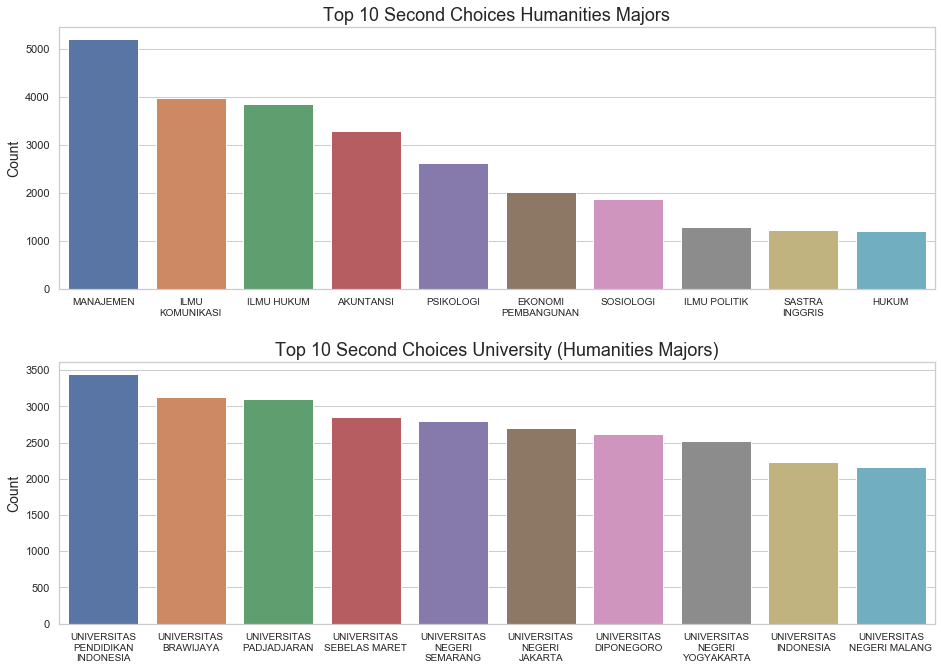

In [18]:
fig, ax = plt.subplots(len(first_choice_humanities), 1, figsize = (14, 10))
fig.tight_layout(pad = 5)
max_width = 13
for ax, col, name in zip(ax.flatten(), second_choice_humanities, second_choice_titles):
    index = score_humanities[col].fillna('NaN').value_counts().index
    count = score_humanities[col].fillna('NaN').value_counts()
    sns.barplot(ax = ax, x = index, y = count, order = index[0:10])
    ax.set_title(name, fontsize = 18)
    ax.set_ylabel('Count', fontsize = 14)
    ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
plt.show()

##### - Boxplot Top 10 Second Choices Major and University

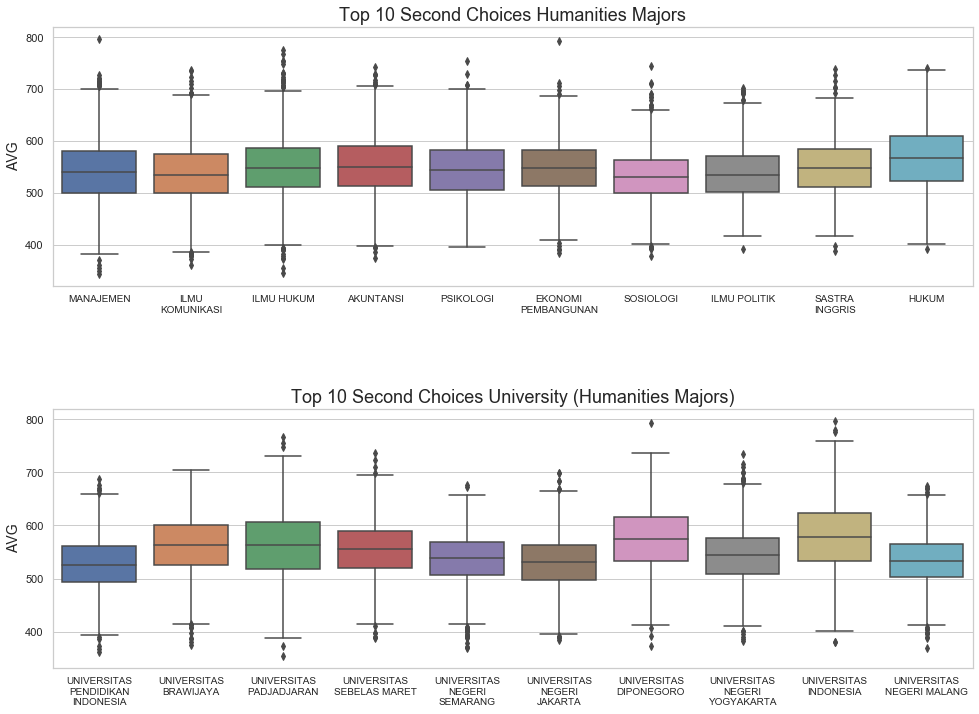

In [19]:
fig, ax = plt.subplots(len(second_choice_humanities), 1, figsize = (16, 12))
fig.tight_layout(pad = 10)
max_width = 13

for ax, col, name in zip(ax.flatten(), second_choice_humanities, second_choice_titles):
    values = score_humanities[col].value_counts().sort_values(ascending = False).index[0:10]
    top_data = score_humanities[score_humanities[col].isin(values)]
    sns.boxplot(ax = ax, data=top_data, x = top_data[col], y = top_data['avg_score'], order = values)
    ax.set_title(name, fontsize = 18)
    ax.set_xlabel('')
    ax.set_ylabel('AVG', fontsize = 14)
    ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)

plt.show()

##### - Barplot and Boxplot Top 5 Second Choices Major - University

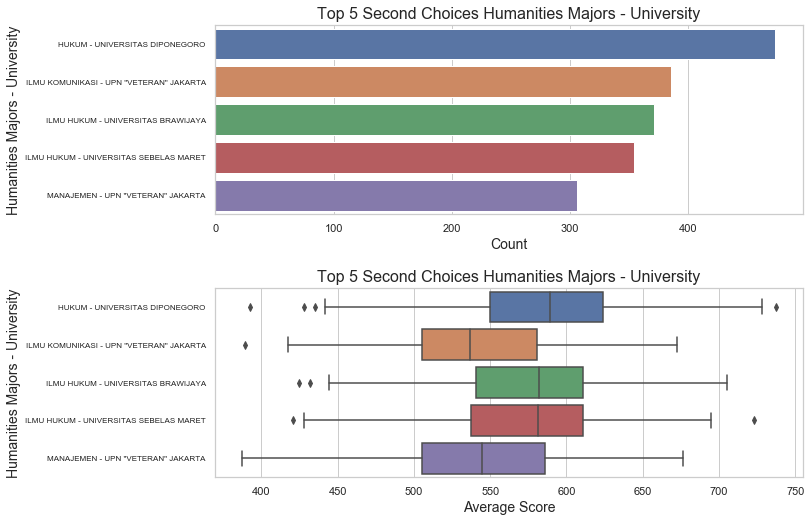

In [20]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
fig.tight_layout(pad = 5)

index = score_humanities['specific_second_choice'].fillna('NaN').value_counts().index
count = score_humanities['specific_second_choice'].fillna('NaN').value_counts()
sns.barplot(ax = ax[0], x = count, y = index, order = index[0:5])
ax[0].set_title('Top 5 Second Choices Humanities Majors - University', fontsize = 16)
ax[0].set_xlabel('Count', fontsize = 14)
ax[0].set_ylabel('Humanities Majors - University', fontsize = 14)
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize = 8)


values = score_humanities['specific_second_choice'].value_counts().sort_values(ascending = False).index[0:5]
top5_data = score_humanities[score_humanities['specific_second_choice'].isin(values)]
sns.boxplot(ax = ax[1], data=top_data, x = top5_data['avg_score'], y = top5_data['specific_second_choice'], order = values)
ax[1].set_title('Top 5 Second Choices Humanities Majors - University', fontsize = 16)
ax[1].set_xlabel('Average Score', fontsize = 14)
ax[1].set_ylabel('Humanities Majors - University', fontsize = 14)
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize = 8)
plt.show()

## Analysis Numeric and Categorical Data on "Score Science" Data

### Analysis Numeric Data on "Score Science" Data

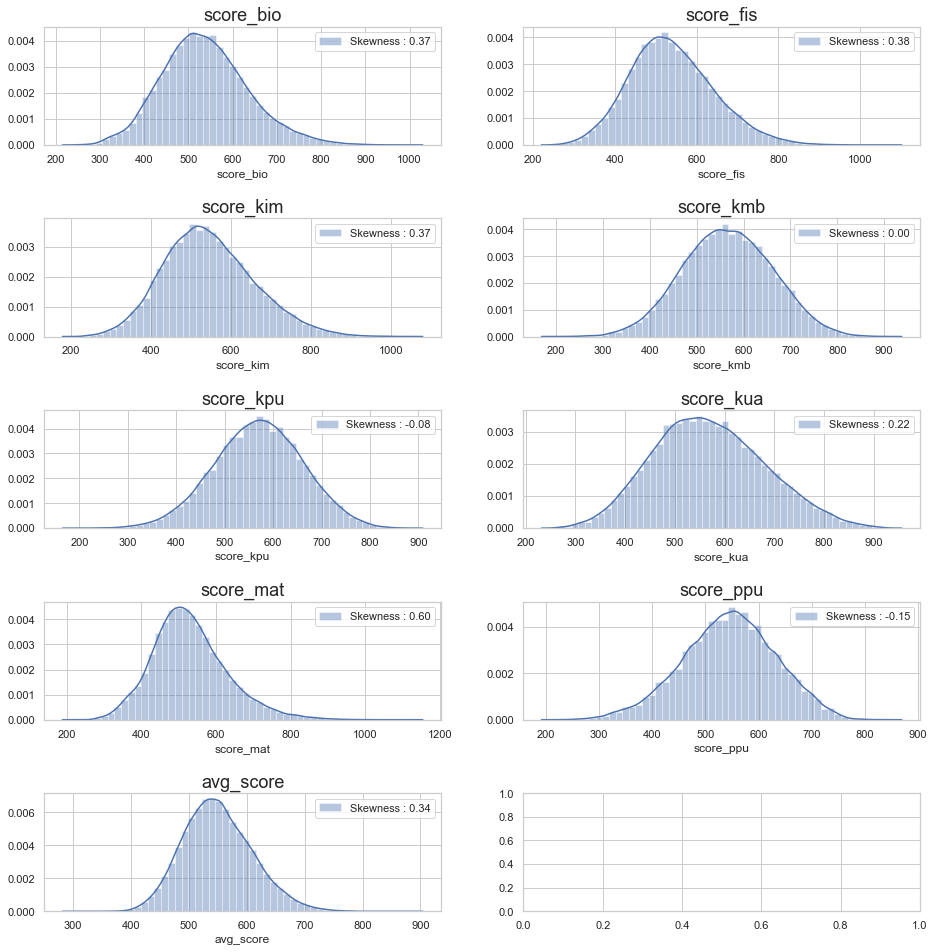

In [21]:
# Create distribution plot on each columns
fig, ax = plt.subplots(5, 2, figsize = (14, 14))
fig.tight_layout(pad = 5)

# Define numeric columns on "Score Humanities" Data
num_score_science = ['score_bio', 'score_fis', 'score_kim', 'score_kmb','score_kpu'
                     , 'score_kua', 'score_mat', 'score_ppu', 'avg_score']

for ax, n in zip(ax.flatten(), num_score_science):
    sns.distplot(ax = ax, a = score_science[n].dropna(), label = "Skewness : %.2f"%(score_science[n].skew()))
    ax.set_title(n, fontsize = 18)
    ax.legend(loc = 'best')

plt.show()

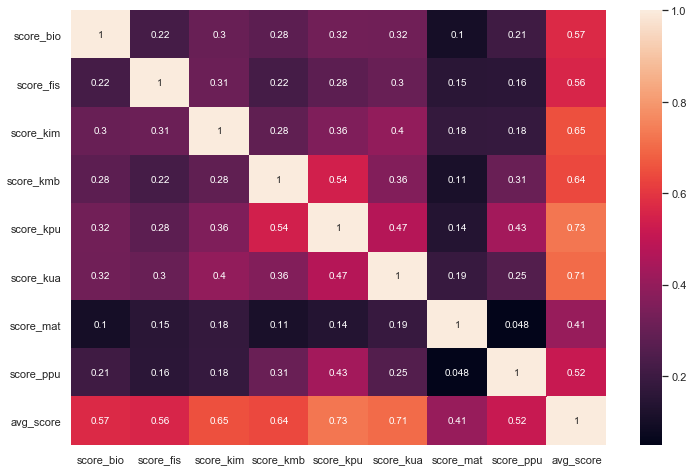

In [22]:
# Create heatmap data numeric
cormat = score_science[num_score_science].corr()
fig, ax = plt.subplots(figsize = (12, 8))
sns.heatmap(ax = ax, data = cormat, annot = True)
ax.set_yticklabels(cormat,rotation = 0)
plt.show()

### Analysis Categorical Data on "Score Science" Data

#### Analysis First Choices Major & University on "Score Science" Data

In [23]:
# Define categorical columns on "Score Humanities" Data
first_choice_science = ['major_name_first_choice', 'university_name_first_choice']
first_choice_titles = ['Top 10 First Choices Science Majors', 'Top 10 First Choices University (Science Majors)']

##### - Barplot Top 10 First Choices Major and University

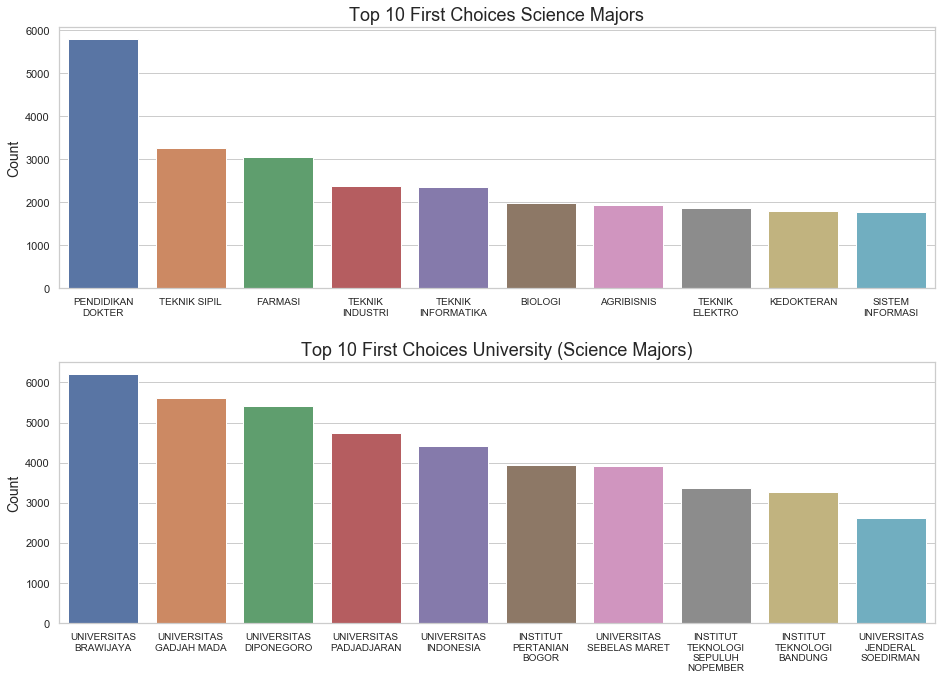

In [24]:
fig, ax = plt.subplots(len(first_choice_science), 1, figsize = (14, 10))
fig.tight_layout(pad = 5)
max_width = 13
for ax, col, name in zip(ax.flatten(), first_choice_science, first_choice_titles):
    index = score_science[col].fillna('NaN').value_counts().index
    count = score_science[col].fillna('NaN').value_counts()
    sns.barplot(ax = ax, x = index, y = count, order = index[0:10])
    ax.set_title(name, fontsize = 18)
    ax.set_ylabel('Count', fontsize = 14)
    ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
plt.show()

##### - Boxplot Top 10 First Choices Major and University

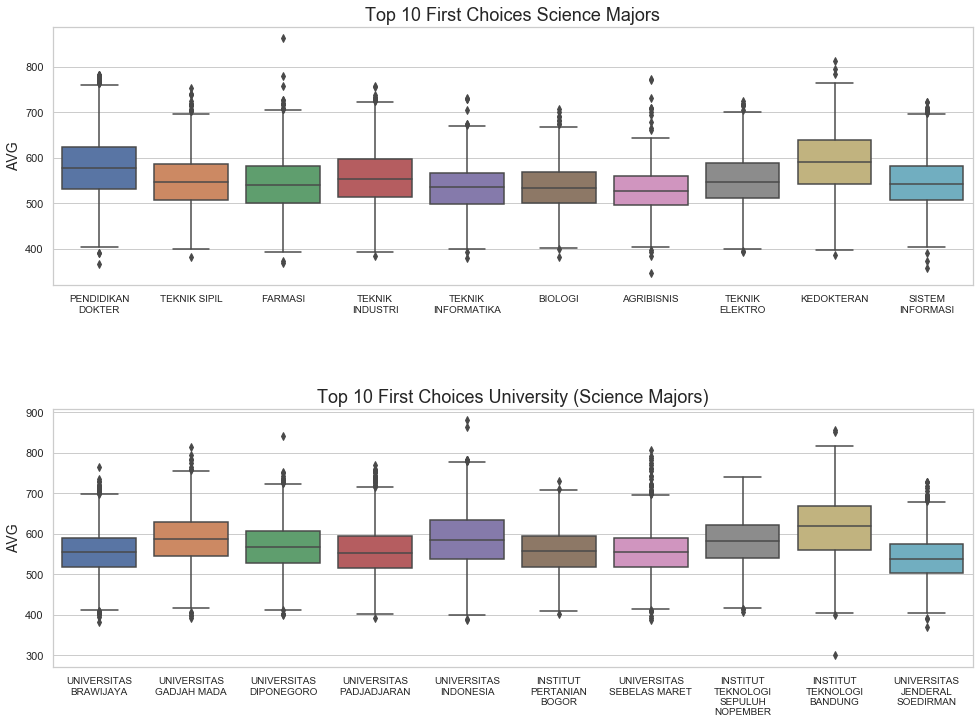

In [25]:
fig, ax = plt.subplots(len(first_choice_science), 1, figsize = (16, 12))
fig.tight_layout(pad = 10)
max_width = 13

for ax, col, name in zip(ax.flatten(), first_choice_science, first_choice_titles):
    values = score_science[col].value_counts().sort_values(ascending = False).index[0:10]
    top_data = score_science[score_science[col].isin(values)]
    sns.boxplot(ax = ax, data=top_data, x = top_data[col], y = top_data['avg_score'], order = values)
    ax.set_title(name, fontsize = 18)
    ax.set_xlabel('')
    ax.set_ylabel('AVG', fontsize = 14)
    ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)

plt.show()

##### - Barplot and Boxplot Top 5 First Choices Major - University

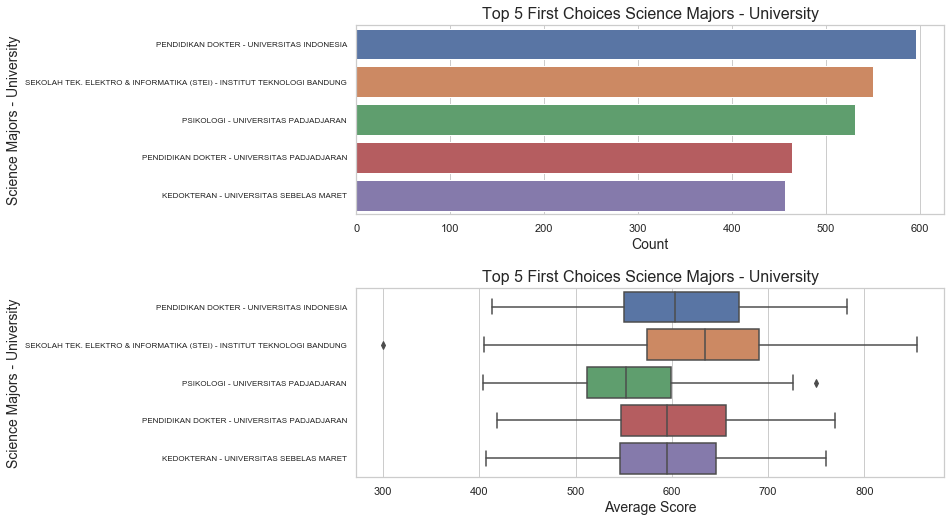

In [26]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
fig.tight_layout(pad = 5)

index = score_science['specific_first_choice'].fillna('NaN').value_counts().index
count = score_science['specific_first_choice'].fillna('NaN').value_counts()
sns.barplot(ax = ax[0], x = count, y = index, order = index[0:5])
ax[0].set_title('Top 5 First Choices Science Majors - University', fontsize = 16)
ax[0].set_xlabel('Count', fontsize = 14)
ax[0].set_ylabel('Science Majors - University', fontsize = 14)
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize = 8)


values = score_science['specific_first_choice'].value_counts().sort_values(ascending = False).index[0:5]
top5_data = score_science[score_science['specific_first_choice'].isin(values)]
sns.boxplot(ax = ax[1], data=top5_data, x = top_data['avg_score'], y = top5_data['specific_first_choice'], order = values)
ax[1].set_title('Top 5 First Choices Science Majors - University', fontsize = 16)
ax[1].set_xlabel('Average Score', fontsize = 14)
ax[1].set_ylabel('Science Majors - University', fontsize = 14)
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize = 8)
plt.show()

#### Analysis Second Choices Major & University on "Score Science" Data

In [27]:
# Define categorical columns on "Score Humanities" Data
second_choice_science = ['major_name_second_choice', 'university_name_second_choice']
second_choice_titles = ['Top 10 Second Choices Science Majors', 'Top 10 Second Choices University (Science Majors)']

##### - Barplot Top 10 Second Choices Major and University

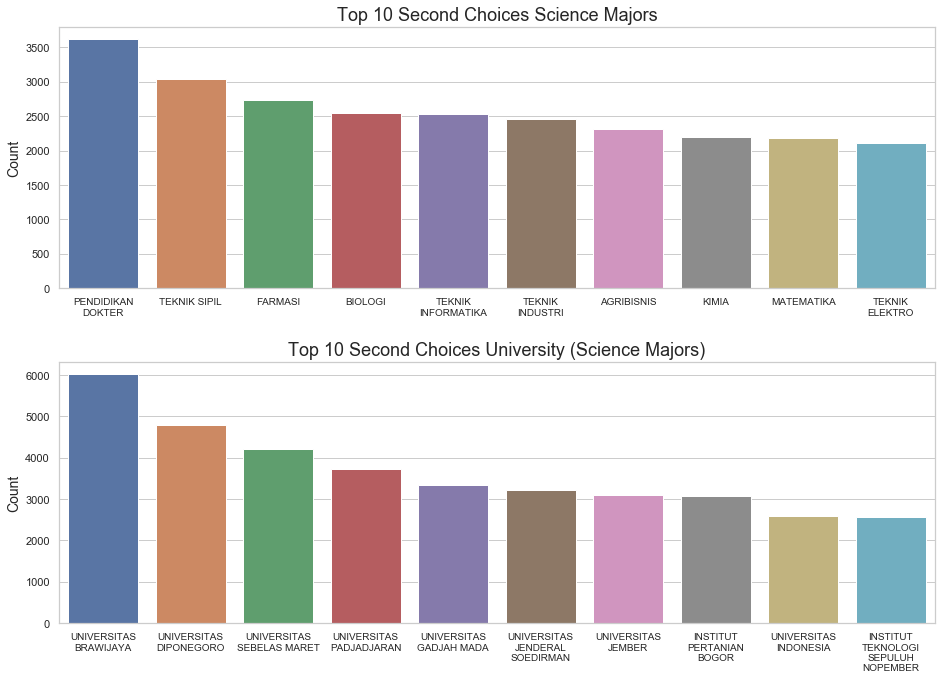

In [28]:
fig, ax = plt.subplots(len(first_choice_science), 1, figsize = (14, 10))
fig.tight_layout(pad = 5)
max_width = 13
for ax, col, name in zip(ax.flatten(), second_choice_science, second_choice_titles):
    index = score_science[col].fillna('NaN').value_counts().index
    count = score_science[col].fillna('NaN').value_counts()
    sns.barplot(ax = ax, x = index, y = count, order = index[0:10])
    ax.set_title(name, fontsize = 18)
    ax.set_ylabel('Count', fontsize = 14)
    ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
plt.show()

##### - Boxplot Top 10 Second Choices Major and University

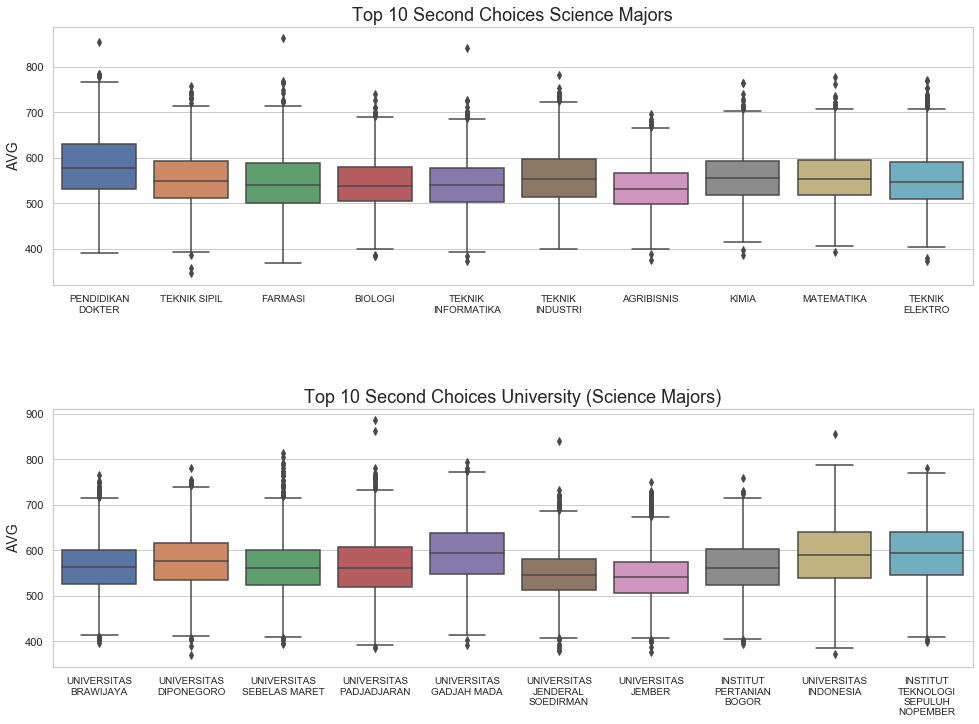

In [29]:
fig, ax = plt.subplots(len(second_choice_science), 1, figsize = (16, 12))
fig.tight_layout(pad = 10)
max_width = 13

for ax, col, name in zip(ax.flatten(), second_choice_science, second_choice_titles):
    values = score_science[col].value_counts().sort_values(ascending = False).index[0:10]
    top_data = score_science[score_science[col].isin(values)]
    sns.boxplot(ax = ax, data=top_data, x = top_data[col], y = top_data['avg_score'], order = values)
    ax.set_title(name, fontsize = 18)
    ax.set_xlabel('')
    ax.set_ylabel('AVG', fontsize = 14)
    ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)

plt.show()

##### - Barplot and Boxplot Top 5 Second Choices Major - University

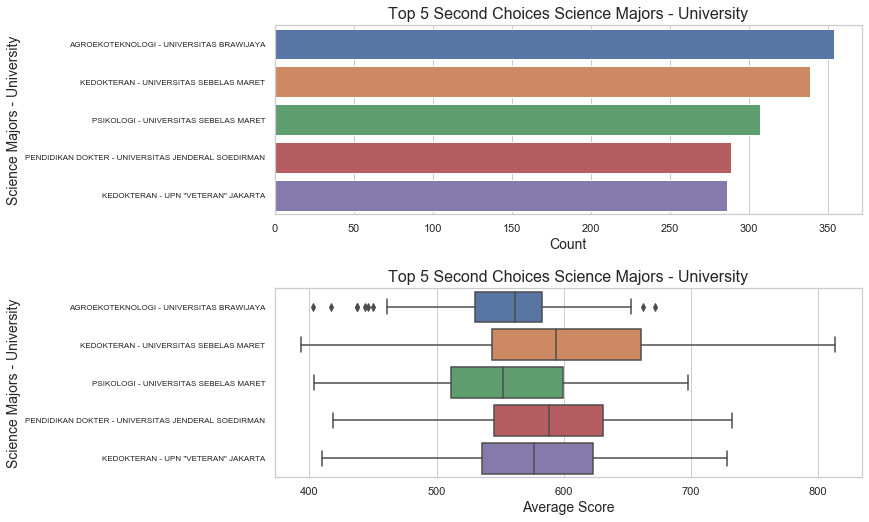

In [30]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
fig.tight_layout(pad = 5)

index = score_science['specific_second_choice'].fillna('NaN').value_counts().index
count = score_science['specific_second_choice'].fillna('NaN').value_counts()
sns.barplot(ax = ax[0], x = count, y = index, order = index[0:5])
ax[0].set_title('Top 5 Second Choices Science Majors - University', fontsize = 16)
ax[0].set_xlabel('Count', fontsize = 14)
ax[0].set_ylabel('Science Majors - University', fontsize = 14)
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize = 8)


values = score_science['specific_second_choice'].value_counts().sort_values(ascending = False).index[0:5]
top5_data = score_science[score_science['specific_second_choice'].isin(values)]
sns.boxplot(ax = ax[1], data=top_data, x = top5_data['avg_score'], y = top5_data['specific_second_choice'], order = values)
ax[1].set_title('Top 5 Second Choices Science Majors - University', fontsize = 16)
ax[1].set_xlabel('Average Score', fontsize = 14)
ax[1].set_ylabel('Science Majors - University', fontsize = 14)
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize = 8)
plt.show()

# Clustering
### "Clustering participant average score with average score of selected major and university (based on participants average score who choose same major and university)"

### Score Humanities Data 

#### First Choice Major and University

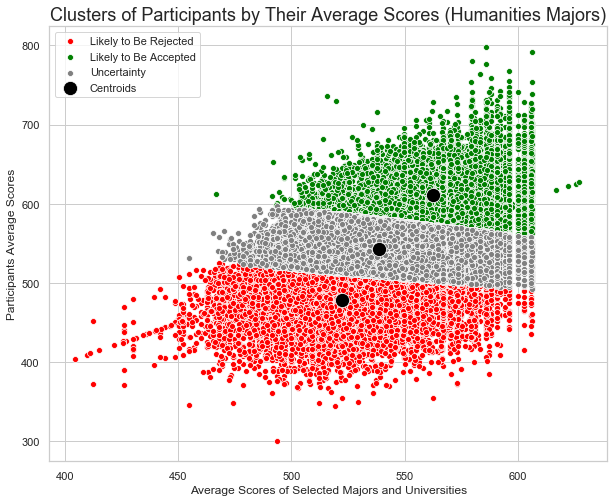

In [31]:
from sklearn.cluster import KMeans

data_cluster = score_humanities[['id_user', 'specific_first_choice', 'avg_score', 'avg_score_first_choice']]
X = data_cluster.iloc[:, 2:4].values
# I choose numbers of cluster based on the Elbow Method
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
y_kmeans = kmeans.fit(X)
y_kmeans = kmeans.predict(X)
data_cluster['clusters'] = y_kmeans
fig, ax = plt.subplots(figsize = (10, 8))
sns.scatterplot(ax = ax, data = score_science, x = data_cluster[data_cluster['clusters'] == 0]['avg_score_first_choice']
                , y = data_cluster[data_cluster['clusters'] == 0]['avg_score'], color = 'red', label = 'Likely to Be Rejected')
sns.scatterplot(ax = ax, data = score_science, x = data_cluster[data_cluster['clusters'] == 1]['avg_score_first_choice']
                , y = data_cluster[data_cluster['clusters'] == 1]['avg_score'], color = 'green', label = 'Likely to Be Accepted')
sns.scatterplot(ax = ax, data = score_science, x = data_cluster[data_cluster['clusters'] == 2]['avg_score_first_choice']
                , y = data_cluster[data_cluster['clusters'] == 2]['avg_score'], color = 'gray', label = 'Uncertainty')
sns.scatterplot(ax = ax, x = kmeans.cluster_centers_[:,1], y = kmeans.cluster_centers_[:,0], s= 200, color= 'black', label = 'Centroids')
ax.set_title('Clusters of Participants by Their Average Scores (Humanities Majors)', fontsize = 18)
ax.set_xlabel('Average Scores of Selected Majors and Universities')
ax.set_ylabel('Participants Average Scores')
plt.show()

In [32]:
data_cluster.loc[data_cluster['clusters'] == 0, 'clusters_information'] = 'Likely to Be Rejected'
data_cluster.loc[data_cluster['clusters'] == 1, 'clusters_information'] = 'Likely to Be Accepted'
data_cluster.loc[data_cluster['clusters'] == 2, 'clusters_information'] = 'Uncertainty'
cluster_first_choice_humanities = data_cluster.copy()
cluster_first_choice_humanities.head()

,id_user,specific_first_choice,avg_score,avg_score_first_choice,clusters,clusters_information
0,26,FAKULTAS SENIRUPA DAN DESAIN (FSRD) - INSTITUT...,610.333333,573.447122,1,Likely to Be Accepted
18147,35,ILMU KOMUNIKASI - UNIVERSITAS INDONESIA,660.555556,569.865539,1,Likely to Be Accepted
55150,44,MANAJEMEN - UNIVERSITAS BRAWIJAYA,482.777778,557.766667,0,Likely to Be Rejected
4415,55,KRIMINOLOGI - UNIVERSITAS INDONESIA,595.111111,560.866487,1,Likely to Be Accepted
46414,171,AKUNTANSI - UNIVERSITAS AIRLANGGA,645.111111,580.595322,1,Likely to Be Accepted


#### Second Choice Major and University

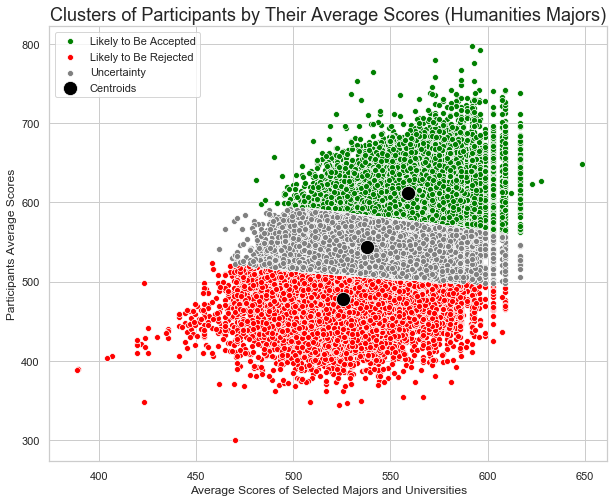

In [33]:
from sklearn.cluster import KMeans

data_cluster = score_humanities[['id_user', 'specific_second_choice', 'avg_score', 'avg_score_second_choice']]
X = data_cluster.iloc[:, 2:4].values
# I choose numbers of cluster based on the Elbow Method
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
y_kmeans = kmeans.fit(X)
y_kmeans = kmeans.predict(X)
data_cluster['clusters'] = y_kmeans
fig, ax = plt.subplots(figsize = (10, 8))
sns.scatterplot(ax = ax, data = score_science, x = data_cluster[data_cluster['clusters'] == 0]['avg_score_second_choice']
                , y = data_cluster[data_cluster['clusters'] == 0]['avg_score'], color = 'green', label = 'Likely to Be Accepted')
sns.scatterplot(ax = ax, data = score_science, x = data_cluster[data_cluster['clusters'] == 1]['avg_score_second_choice']
                , y = data_cluster[data_cluster['clusters'] == 1]['avg_score'], color = 'red', label = 'Likely to Be Rejected')
sns.scatterplot(ax = ax, data = score_science, x = data_cluster[data_cluster['clusters'] == 2]['avg_score_second_choice']
                , y = data_cluster[data_cluster['clusters'] == 2]['avg_score'], color = 'gray', label = 'Uncertainty')
sns.scatterplot(ax = ax, x = kmeans.cluster_centers_[:,1], y = kmeans.cluster_centers_[:,0], s= 200, color= 'black', label = 'Centroids')
ax.set_title('Clusters of Participants by Their Average Scores (Humanities Majors)', fontsize = 18)
ax.set_xlabel('Average Scores of Selected Majors and Universities')
ax.set_ylabel('Participants Average Scores')
plt.show()

In [34]:
data_cluster.loc[data_cluster['clusters'] == 0, 'clusters_information'] = 'Likely to Be Accepted'
data_cluster.loc[data_cluster['clusters'] == 1, 'clusters_information'] = 'Likely to Be Rejected'
data_cluster.loc[data_cluster['clusters'] == 2, 'clusters_information'] = 'Uncertainty'
cluster_second_choice_humanities = data_cluster.copy()
cluster_second_choice_humanities.head()

,id_user,specific_second_choice,avg_score,avg_score_second_choice,clusters,clusters_information
0,26,DESAIN KOMUNIKASI VISUAL - UNIVERSITAS SEBELAS...,610.333333,549.880193,0,Likely to Be Accepted
18147,35,SEKOLAH BISNIS DAN MANAJEMEN (SBM) - INSTITUT ...,660.555556,572.911111,0,Likely to Be Accepted
55150,44,MANAJEMEN - UNIVERSITAS LAMPUNG,482.777778,518.014286,1,Likely to Be Rejected
4415,55,BAHASA DAN KEBUDAYAAN KOREA - UNIVERSITAS INDO...,595.111111,544.579580,0,Likely to Be Accepted
46414,171,"AKUNTANSI - UPN ""VETERAN"" JAWA TIMUR",645.111111,547.709877,0,Likely to Be Accepted


### Score Science Data 

#### First Choice Major and University

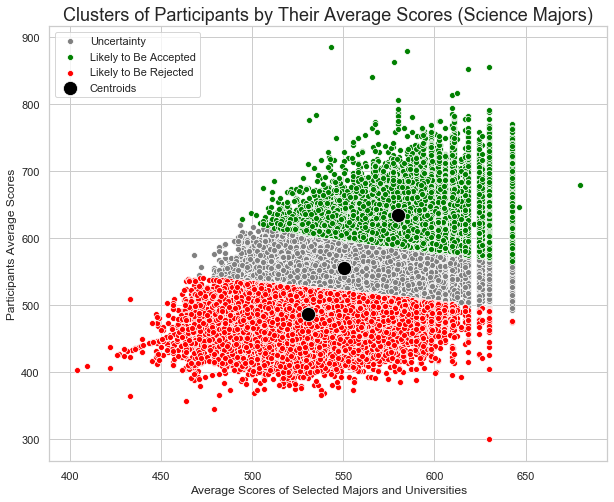

In [35]:
from sklearn.cluster import KMeans

data_cluster = score_science[['id_user', 'specific_first_choice', 'avg_score', 'avg_score_first_choice' ]]
X = data_cluster.iloc[:, 2:4].values
# I choose numbers of cluster based on the Elbow Method
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
y_kmeans = kmeans.fit(X)
y_kmeans = kmeans.predict(X)
data_cluster['clusters'] = y_kmeans
fig, ax = plt.subplots(figsize = (10, 8))
sns.scatterplot(ax = ax, data = score_science, x = data_cluster[data_cluster['clusters'] == 0]['avg_score_first_choice']
                , y = data_cluster[data_cluster['clusters'] == 0]['avg_score'], color = 'gray', label = 'Uncertainty')
sns.scatterplot(ax = ax, data = score_science, x = data_cluster[data_cluster['clusters'] == 1]['avg_score_first_choice']
                , y = data_cluster[data_cluster['clusters'] == 1]['avg_score'], color = 'green', label = 'Likely to Be Accepted')
sns.scatterplot(ax = ax, data = score_science, x = data_cluster[data_cluster['clusters'] == 2]['avg_score_first_choice']
                , y = data_cluster[data_cluster['clusters'] == 2]['avg_score'], color = 'red', label = 'Likely to Be Rejected')
sns.scatterplot(ax = ax, x = kmeans.cluster_centers_[:,1], y = kmeans.cluster_centers_[:,0], s= 200, color= 'black', label = 'Centroids')
ax.set_title('Clusters of Participants by Their Average Scores (Science Majors)', fontsize = 18)
ax.set_xlabel('Average Scores of Selected Majors and Universities')
ax.set_ylabel('Participants Average Scores')
plt.show()

In [36]:
data_cluster.loc[data_cluster['clusters'] == 0, 'clusters_information'] = 'Uncertainty'
data_cluster.loc[data_cluster['clusters'] == 1, 'clusters_information'] = 'Likely to Be Accepted'
data_cluster.loc[data_cluster['clusters'] == 2, 'clusters_information'] = 'Likely to Be Rejected'
cluster_first_choice_science = data_cluster.copy()
cluster_first_choice_science.head()

,id_user,specific_first_choice,avg_score,avg_score_first_choice,clusters,clusters_information
0,4,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS - I...,400.000,601.102586,2,Likely to Be Rejected
4237,14,PENDIDIKAN DOKTER - UNIVERSITAS INDONESIA,682.375,610.945050,1,Likely to Be Accepted
24120,19,ILMU DAN TEKNOLOGI PANGAN - UNIVERSITAS BRAWIJAYA,648.625,554.377591,1,Likely to Be Accepted
24634,23,FAKULTAS TEKNIK MESIN & DIRGANTARA (FTMD) - IN...,665.625,618.625000,1,Likely to Be Accepted
85156,28,TEKNIK PERANGKAT LUNAK (TEK. INFORMATIKA) - UN...,526.625,503.653846,2,Likely to Be Rejected


#### Second Choice Major and University

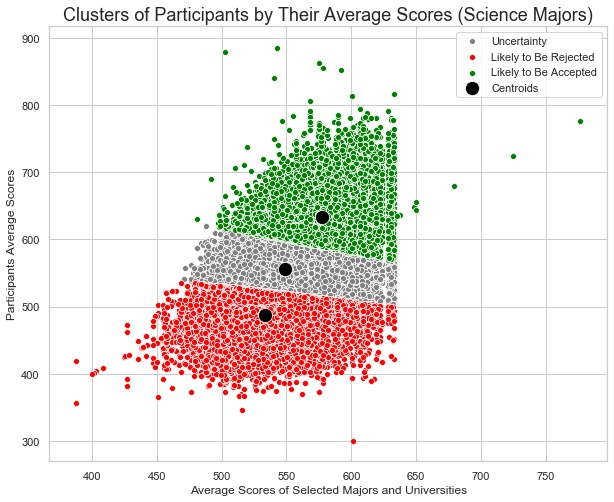

In [37]:
from sklearn.cluster import KMeans

data_cluster = score_science[['id_user', 'specific_second_choice', 'avg_score', 'avg_score_second_choice', ]]
X = data_cluster.iloc[:, 2:4].values
# I choose numbers of cluster based on the Elbow Method
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
y_kmeans = kmeans.fit(X)
y_kmeans = kmeans.predict(X)
data_cluster['clusters'] = y_kmeans
fig, ax = plt.subplots(figsize = (10, 8))
sns.scatterplot(ax = ax, data = score_science, x = data_cluster[data_cluster['clusters'] == 0]['avg_score_second_choice']
                , y = data_cluster[data_cluster['clusters'] == 0]['avg_score'], color = 'gray', label = 'Uncertainty')
sns.scatterplot(ax = ax, data = score_science, x = data_cluster[data_cluster['clusters'] == 1]['avg_score_second_choice']
                , y = data_cluster[data_cluster['clusters'] == 1]['avg_score'], color = 'red', label = 'Likely to Be Rejected')
sns.scatterplot(ax = ax, data = score_science, x = data_cluster[data_cluster['clusters'] == 2]['avg_score_second_choice']
                , y = data_cluster[data_cluster['clusters'] == 2]['avg_score'], color = 'green', label = 'Likely to Be Accepted')
sns.scatterplot(ax = ax, x = kmeans.cluster_centers_[:,1], y = kmeans.cluster_centers_[:,0], s= 200, color= 'black', label = 'Centroids')
ax.set_title('Clusters of Participants by Their Average Scores (Science Majors)', fontsize = 18)
ax.set_xlabel('Average Scores of Selected Majors and Universities')
ax.set_ylabel('Participants Average Scores')
plt.show()

In [38]:
data_cluster.loc[data_cluster['clusters'] == 0, 'clusters_information'] = 'Uncertainty'
data_cluster.loc[data_cluster['clusters'] == 1, 'clusters_information'] = 'Likely to Be Rejected'
data_cluster.loc[data_cluster['clusters'] == 2, 'clusters_information'] = 'Likely to Be Accepted'
cluster_second_choice_science = data_cluster.copy()
cluster_second_choice_science.head()

,id_user,specific_second_choice,avg_score,avg_score_second_choice,clusters,clusters_information
0,4,PSIKOLOGI - UNIVERSITAS PADJADJARAN,400.000,557.648634,1,Likely to Be Rejected
4237,14,KEDOKTERAN - UNIVERSITAS GADJAH MADA,682.375,606.664062,2,Likely to Be Accepted
24120,19,TEKNOLOGI PANGAN - UNIVERSITAS DIPONEGORO,648.625,564.494391,2,Likely to Be Accepted
24634,23,TEKNIK MESIN - UNIVERSITAS DIPONEGORO,665.625,589.242347,2,Likely to Be Accepted
85156,28,TEKNIK SIPIL - UNIVERSITAS PALANGKARAYA,526.625,517.180556,1,Likely to Be Rejected
